<a href="https://colab.research.google.com/github/A24bhi/Restaurant-Revenue-Prediction-DS-Project5/blob/main/Restaurant_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings; warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Restaurant_revenue (1).csv')
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [5]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [6]:
df.shape

(1000, 8)

In [7]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [8]:
df.isnull().sum()

,0
Number_of_Customers,0
Menu_Price,0
Marketing_Spend,0
Cuisine_Type,0
Average_Customer_Spending,0
Promotions,0
Reviews,0
Monthly_Revenue,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


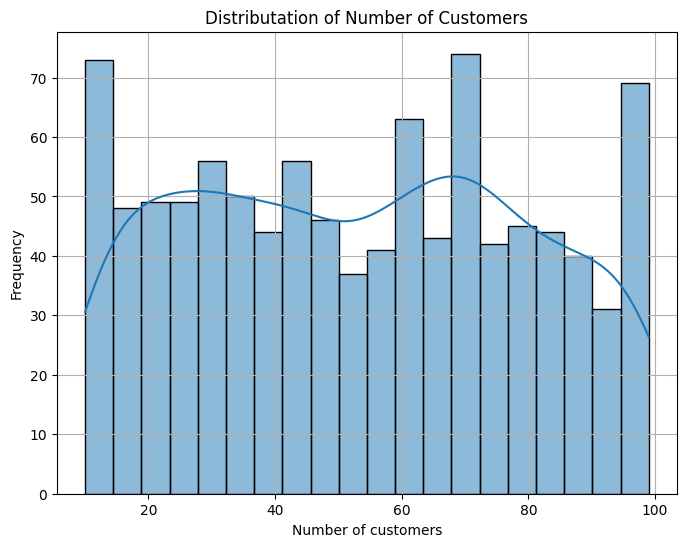

In [11]:
#EDA

plt.figure(figsize=(8,6))
sns.histplot(df['Number_of_Customers'],bins=20,kde=True)
plt.title('Distributation of Number of Customers')
plt.xlabel('Number of customers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

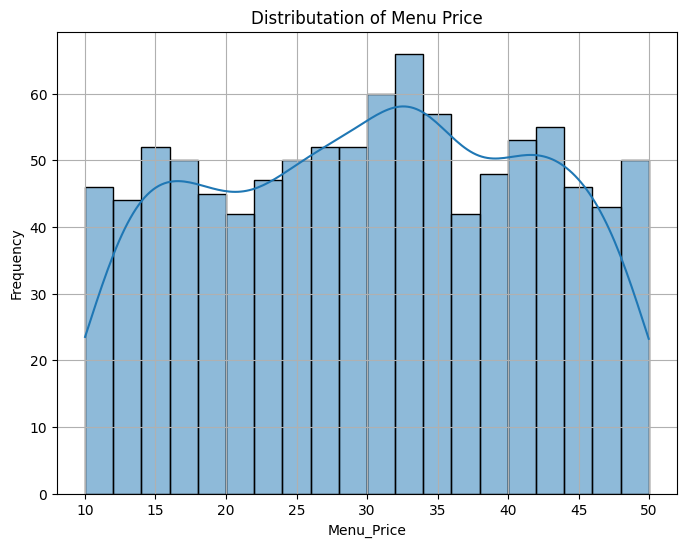

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['Menu_Price'],bins=20,kde=True)
plt.title('Distributation of Menu Price')
plt.xlabel('Menu_Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
#Categorical Value Analysis
cuisine_num = df['Cuisine_Type'].value_counts()
cuisine_num

,count
Cuisine_Type,
Japanese,262
American,256
Mexican,250
Italian,232


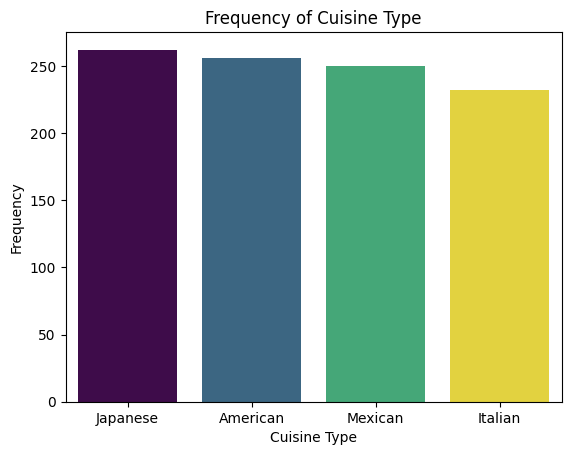

In [14]:
cmap=plt.get_cmap('viridis')
sns.barplot(x=cuisine_num.index,y=cuisine_num.values,palette=cmap(np.linspace(0,1,len(cuisine_num))))
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Frequency of Cuisine Type')
plt.show()

In [15]:
corr=df.corr(numeric_only=True)
corr

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
Number_of_Customers,1.000000,0.033470,-0.007024,-0.013898,0.058693,-0.010140,0.745239
Menu_Price,0.033470,1.000000,0.016319,0.020808,0.022068,0.003792,0.259579
Marketing_Spend,-0.007024,0.016319,1.000000,-0.058586,-0.041838,-0.031470,0.269929
Average_Customer_Spending,-0.013898,0.020808,-0.058586,1.000000,0.006620,0.054163,-0.035665
Promotions,0.058693,0.022068,-0.041838,0.006620,1.000000,-0.021635,0.014869
Reviews,-0.010140,0.003792,-0.031470,0.054163,-0.021635,1.000000,-0.024946
Monthly_Revenue,0.745239,0.259579,0.269929,-0.035665,0.014869,-0.024946,1.000000


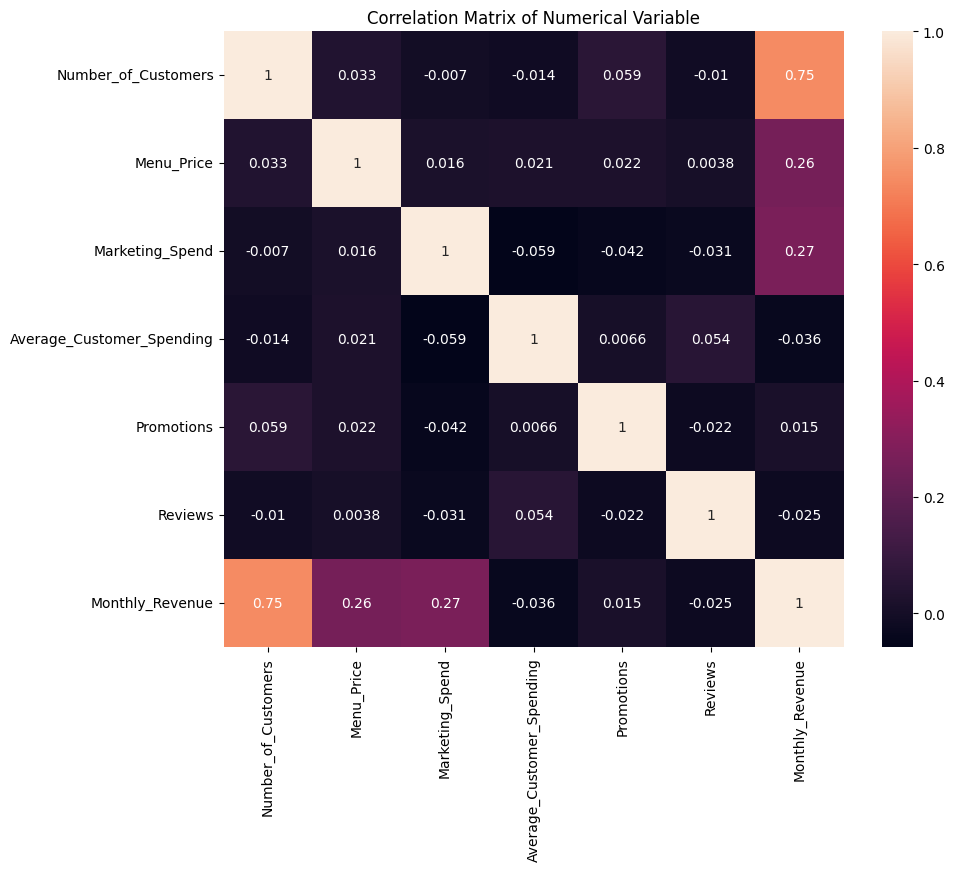

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix of Numerical Variable')
plt.show()

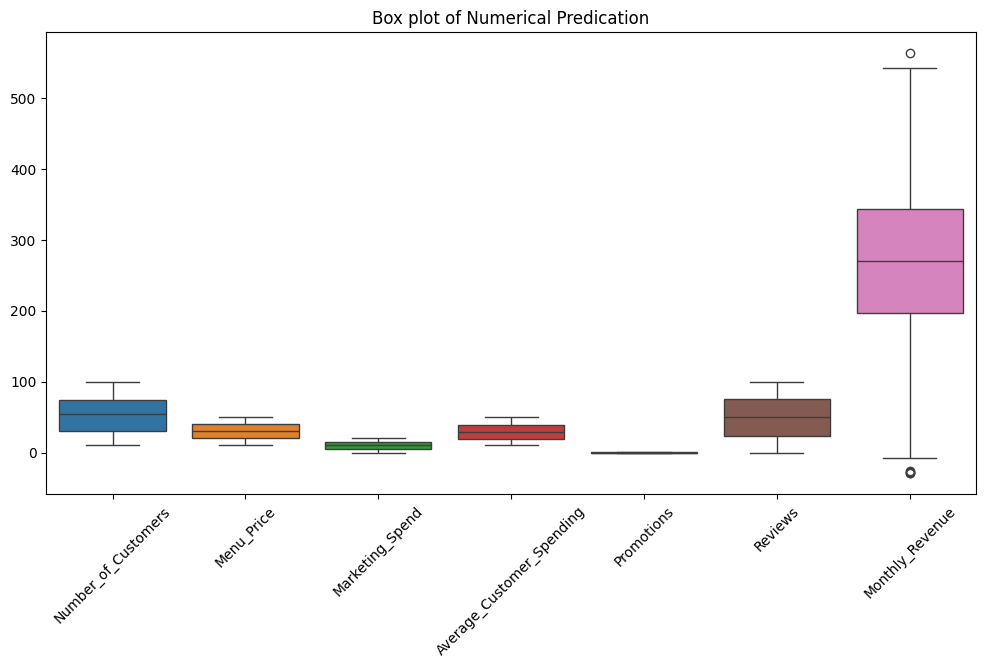

In [17]:
numeric_variable=['Number_of_Customers','Menu_Price',	'Marketing_Spend',	'Average_Customer_Spending',	'Promotions',	'Reviews',	'Monthly_Revenue']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_variable])
plt.title('Box plot of Numerical Predication')
plt.xticks(rotation=45)
plt.show()

In [18]:
df=pd.get_dummies(df)
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Type_American,Cuisine_Type_Italian,Cuisine_Type_Japanese,Cuisine_Type_Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,False,False,True,False
1,24,40.020077,4.577892,17.952562,0,36,221.319091,False,True,False,False
2,81,41.981485,4.652911,22.600420,1,91,326.529763,False,False,True,False
3,70,43.005307,4.416053,18.984098,1,59,348.190573,False,True,False,False
4,30,17.456199,3.475052,12.766143,1,30,185.009121,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,249.312034,False,False,True,False
996,31,20.615496,5.822885,17.040990,0,57,110.228767,False,False,False,True
997,69,17.110656,4.141898,44.649315,0,55,312.212552,False,False,True,False
998,73,37.664722,3.046556,27.767358,0,23,272.482204,False,False,True,False


In [ ]:
# MODEL SELECTION AND EVALUATION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
x=df.drop(['Monthly_Revenue'],axis=1)
y=df['Monthly_Revenue']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=model.predict(x_test)

In [25]:
from sklearn.metrics import *

In [26]:
r2_score(y_test,y_pred)

0.6740626407300359

In [27]:
pip install pycaret

In [28]:
from pycaret.regression import *

In [29]:
exp = setup(df,target='Monthly_Revenue',session_id=123)

,Description,Value
0,Session id,123
1,Target,Monthly_Revenue
2,Target type,Regression
3,Original data shape,"(1000, 11)"
4,Transformed data shape,"(1000, 11)"
5,Transformed train set shape,"(700, 11)"
6,Transformed test set shape,"(300, 11)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [31]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,46.4229,3389.5859,58.0370,0.6662,0.3184,0.3149,0.0580
br,Bayesian Ridge,46.4315,3390.2999,58.0415,0.6661,0.3184,0.3152,0.1450
lasso,Lasso Regression,46.4471,3390.8139,58.0477,0.6660,0.3183,0.3141,0.0670
llar,Lasso Least Angle Regression,46.4471,3390.8137,58.0477,0.6660,0.3183,0.3141,0.0680
lr,Linear Regression,46.6498,3417.4453,58.2596,0.6636,0.3185,0.3165,0.1420
ridge,Ridge Regression,46.6474,3417.1264,58.2570,0.6636,0.3185,0.3165,0.0720
lar,Least Angle Regression,46.6498,3417.4458,58.2596,0.6636,0.3185,0.3165,0.0640
huber,Huber Regressor,46.7243,3420.7454,58.2882,0.6633,0.3193,0.3195,0.1370
gbr,Gradient Boosting Regressor,48.5527,3719.0751,60.8318,0.6330,0.3218,0.3138,0.2060
ada,AdaBoost Regressor,50.0330,3887.8506,62.1961,0.6168,0.3330,0.3256,0.1400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]